# Effectiveness prediction

In [3]:
import pandas as pd
import json
import random
import numpy as np

In [25]:
creative_data = pd.read_csv('./data/creative_data.csv')

In [8]:
creative_features = pd.read_csv('./data/features/classical_creative_features.csv')

In [6]:
creative_data.head()

,creative_id,no_of_days,impressions,clicks,campaign_counts,no_of_days_min,impressions_min,clicks_min,no_of_days_max,impressions_max,...,week_day,no_of_week_end,Display_days,Mobile_days,Search_days,Social_days,Video_days,country,ctir,effectiveness_category
0,1000,45,9471,152,5,7,837,8,11,2634,...,38,7,0,18,0,17,10,Singapore,1.604899,above_med
1,1005,5643,52011,638,66,53,524,2,118,2919,...,4869,774,1236,936,1913,826,732,US,1.226664,below_med
2,1010,5643,38026,519,66,53,514,2,118,787,...,4869,774,814,1354,1182,1193,1100,US,1.364856,above_med
3,1015,5643,48051,629,66,53,546,2,118,1653,...,4869,774,682,816,1417,1547,1181,US,1.309026,below_med
4,1020,5643,38519,512,66,53,514,3,118,878,...,4869,774,1198,1260,1109,985,1091,US,1.329214,above_med


In [9]:
creative_features.head()

,creative_id,aspect_ratio,color,read_mean,green_mean,blue_mean,red_std,green_std,blue_std,brightness,...,blue_dom_color7,weight_dom_color7,red_dom_color8,green_dom_color8,blue_dom_color8,weight_dom_color8,red_dom_color9,green_dom_color9,blue_dom_color9,weight_dom_color9
0,1000,0.667188,1,0.199123,0.271816,0.371865,48.531470,36.073478,46.842777,0.261469,...,0.143347,0.031971,0.030897,0.375683,0.673309,0.043699,0.452279,0.529923,0.590956,0.044855
1,10000,1.319736,1,0.779949,0.779218,0.777672,56.022431,56.278342,56.366826,0.779306,...,0.555901,0.032253,0.606414,0.605481,0.600985,0.038587,0.382069,0.380722,0.376519,0.042227
2,10005,0.772727,0,0.145030,0.145030,0.145030,85.944494,85.944494,85.944494,0.145030,...,0.721242,0.002160,0.322807,0.322807,0.322807,0.002211,0.659941,0.659941,0.659941,0.002298
3,10010,1.777778,1,0.943396,0.369360,0.401235,44.115418,95.586132,85.899619,0.544297,...,0.534784,0.001066,0.566190,0.378674,0.322565,0.001541,0.505679,0.089081,0.061342,0.001569
4,10015,0.706250,1,0.628284,0.486499,0.436248,31.831054,36.820207,34.461763,0.523478,...,0.271857,0.014137,0.280988,0.152431,0.116449,0.015404,0.979414,0.748960,0.623834,0.016077


In [26]:
creative_data = pd.merge(creative_data, creative_features, on='creative_id')

In [27]:
creative_data.columns

Index(['creative_id', 'no_of_days', 'impressions', 'clicks', 'campaign_counts',
       'no_of_days_min', 'impressions_min', 'clicks_min', 'no_of_days_max',
       'impressions_max', 'clicks_max', 'week_day', 'no_of_week_end',
       'Display_days', 'Mobile_days', 'Search_days', 'Social_days',
       'Video_days', 'country', 'ctir', 'effectiveness_category',
       'aspect_ratio', 'color', 'read_mean', 'green_mean', 'blue_mean',
       'red_std', 'green_std', 'blue_std', 'brightness', 'contrast', 'entropy',
       'warm_fraction', 'cool_fraction', 'saturation_mean', 'red_dom_color0',
       'green_dom_color0', 'blue_dom_color0', 'weight_dom_color0',
       'red_dom_color1', 'green_dom_color1', 'blue_dom_color1',
       'weight_dom_color1', 'red_dom_color2', 'green_dom_color2',
       'blue_dom_color2', 'weight_dom_color2', 'red_dom_color3',
       'green_dom_color3', 'blue_dom_color3', 'weight_dom_color3',
       'red_dom_color4', 'green_dom_color4', 'blue_dom_color4',
       'weight_do

In [39]:
#split train/test

random.seed(42)
list_creative_ids = list(creative_data.index)
random.shuffle(list_creative_ids)

train_test_split_index = int(len(list_creative_ids) * 0.8)
creative_ids_train = list_creative_ids[:train_test_split_index]
creative_ids_test = list_creative_ids[train_test_split_index:]

train_data = creative_data.loc[creative_ids_train]
test_data = creative_data.loc[creative_ids_test]


Rather than regression of the metric we chose for effectiveness (CTIR), we are probably more interested in classification, or being able to predict if a creative will be effective or not. We defined already a category for this based on the CTIR. The thresholds were a bit arbritary, based on percentiles per country, but will be good enough for this exercise.

In [29]:
train_data.effectiveness_category.value_counts() / len(train_data)

effectiveness_category
below_med      0.496791
above_med      0.297818
good           0.154899
exceptional    0.050492
Name: count, dtype: float64

In [30]:
test_data.effectiveness_category.value_counts() / len(test_data)

effectiveness_category
below_med      0.509402
above_med      0.307692
good           0.129915
exceptional    0.052991
Name: count, dtype: float64

Thanks to the random split, the statistics of the category are practically equal between train and test datasets.
Let us reduce further the categories first and group together below and above med as 0 and good and exceptional as 1 for a binary class, which will be the target, "effective"

In [40]:
train_data['effective'] = train_data.effectiveness_category.isin(['good', 'exceptional']).astype(int)
test_data['effective'] = test_data.effectiveness_category.isin(['good', 'exceptional']).astype(int)

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [60]:
features = [#'no_of_days', 'no_of_week_end',
       #'Display_days', 'Mobile_days', 'Search_days', 'Social_days',
       #'Video_days',
       'encoded_country',
       'aspect_ratio', 'color', 'read_mean', 'green_mean', 'blue_mean',
       'red_std', 'green_std', 'blue_std', 'brightness', 'contrast', 'entropy',
       'warm_fraction', 'cool_fraction', 'saturation_mean', 'red_dom_color0',
       'green_dom_color0', 'blue_dom_color0', 'weight_dom_color0',
       'red_dom_color1', 'green_dom_color1', 'blue_dom_color1',
       'weight_dom_color1', 'red_dom_color2', 'green_dom_color2',
       'blue_dom_color2', 'weight_dom_color2', 'red_dom_color3',
       'green_dom_color3', 'blue_dom_color3', 'weight_dom_color3',
       'red_dom_color4', 'green_dom_color4', 'blue_dom_color4',
       'weight_dom_color4', 'red_dom_color5', 'green_dom_color5',
       'blue_dom_color5', 'weight_dom_color5', 'red_dom_color6',
       'green_dom_color6', 'blue_dom_color6', 'weight_dom_color6',
       'red_dom_color7', 'green_dom_color7', 'blue_dom_color7',
       'weight_dom_color7', 'red_dom_color8', 'green_dom_color8',
       'blue_dom_color8', 'weight_dom_color8', 'red_dom_color9',
       'green_dom_color9', 'blue_dom_color9', 'weight_dom_color9']
target = 'effective'

label_encoder = LabelEncoder()
train_data['encoded_country'] = label_encoder.fit_transform(train_data['country'])
test_data['encoded_country'] = label_encoder.transform(test_data['country'])

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

train_lgb = lgb.Dataset(X_train, label=y_train)
#test_lgb = lgb.Dataset(X_test, label=y_test)

# LightGBM parameters
params = {
    'objective': 'binary',  # Binary classification
    'metric': 'auc',#'binary_logloss',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}


# Train the model
model_effective = lgb.train(params, train_lgb,
                  num_boost_round=1000, valid_sets=[train_lgb, train_lgb])

y_pred_proba = model_effective.predict(X_test)

y_pred = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities for AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7932
ROC AUC: 0.4729
Precision: 0.1818
Recall: 0.0374
F1 Score: 0.0620


In [62]:
y_pred = (y_pred_proba >= 0.7).astype(int)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities for AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7983
ROC AUC: 0.4729
Precision: 0.1333
Recall: 0.0187
F1 Score: 0.0328


In [63]:
y_random = np.random.randint(0, 2, size=len(y_test))
accuracy = accuracy_score(y_test, y_random)
roc_auc = roc_auc_score(y_test, np.ones(len(y_test)) * 0.5)  # Use probabilities for AUC
precision = precision_score(y_test, y_random)
recall = recall_score(y_test, y_random)
f1 = f1_score(y_test, y_random)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.4923
ROC AUC: 0.5000
Precision: 0.1747
Recall: 0.4766
F1 Score: 0.2556


In [64]:
y_0 = np.zeros(len(y_test))
accuracy = accuracy_score(y_test, y_0)
roc_auc = roc_auc_score(y_test, np.ones(len(y_test)))  # Use probabilities for AUC
precision = precision_score(y_test, y_0)
recall = recall_score(y_test, y_0)
f1 = f1_score(y_test, y_0)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8171
ROC AUC: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


C:\Users\david\projects\smartassets_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

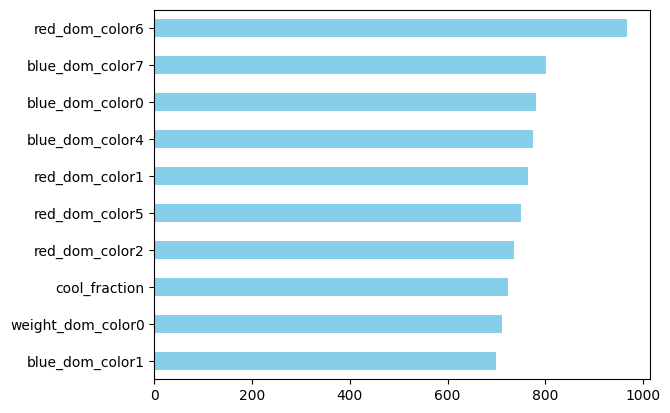

In [65]:
feature_importances = model_effective.feature_importance()

importance_df = pd.Series(index=features, data=feature_importances, name='feature importance')

top_10_features = importance_df.sort_values(ascending=False).head(10).sort_values()

# Plot the top 10 features
top_10_features.plot.barh(color='skyblue')


## Using modern feat

In [ ]:
with open('data/features/output_features_gvlab_vit6b.json', 'r') as jfile:
    dict_features = json.load(jfile)